<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

# Data Wrangling ASG1, Ambrish Krishna Muralitharan, S10223486G<a id="top"></a>

## Table of Contents
### 1.	[Introduction](#part1)
   - [1.1 Background](#part1.1)
   - [1.2 Project Objectives](#part1.2)
       
       
### 2.	[Data Exploration](#part2) 
   - [2.1 Load Data](#part2.1)
   - [2.2 Relationships between Variables](#part2.2)
       - [2.2.1 Item_Weight vs Target](#part2.2.1)
       - [2.2.2 Item_Visibility vs Target](#part2.2.2)
       - [2.2.3 Item_MRP vs Target](#part2.2.3)
       - [2.2.4 Outlet_Establishment_Year vs Target](#part2.2.4)
   
   
   
### 3.	[Data Cleansing](#part3) 
   - [3.1 Identify Missing Values](#part3.1)
   - [3.2 Train and Test Split](#part3.2)   


### 4.  [Data Transformation](#part4) 
   - [4.1 Data Pre-Processing](#part4.1)
       - [4.1.1 Before Transformation](#part4.1.1)
       - [4.1.2 After Transformation](#part4.1.2)
   - [4.2 Categorical Data](#part4.2)
   - [4.3 Variable Discretisation/Binning](#part4.3)


### 5.  [Feature Engineer](#part5)
   - [5.1 Normalization](#part5.1)  
   - [5.2 Standardisation](#part5.2)
   - [5.3 Normalisation VS Standardisation](#part5.3)
   - [5.4 PlotScaled](#part5.4)         

           
### 6. [Linear Regression Model](#part6)
   - [6.1 Building and Evaluating the Model](#part6.1)
       
       
### 7. [Summary and Further Improvements](#part7)

# 1. Introduction<a id="part1"></a>
[Back to top](#top)

### 1.1 Background <a id="part1.1"></a> 
[Back to top](#top)

The data (‘supermarket.csv’) have been collected at various supermarket outlets and stores in different cities. The aim is to predict the sales of each product at a particular outlet. Using this, supermarket management team will try to understand the properties of products and outlets which play a key role in increasing sales.

## 1.2 Project Objectives <a id="part1.2"></a>
[Back to top](#top)

In this assignment we will wrangle the data from a real-life dataset to understand different data wrangling techniques. 

The Project Objectives are as follows:

a)	To conduct data exploration, preparation and transformation through different methods

b)	To prepare the data and ensure that it is ready for modeling, building and evaluating a simple linear regression model. 

c)	To document the analysis, comparisons and findings


## 2. Data Exploration<a id="part2"></a> 

[Back to top](#top)



 ### 2.1 Load Data <a id="part2.1"></a> 
 [Back to top](#top)

First, before exploring the data, let's import the required libraries needed to accomplish all the tasks required for this report. They are separated into 9 parts. The 8 parts are as follows: Import Packages, Visuals, Train and Test Split, Variable Discretization/Binning, Imputation of Missing Data, Encoding of Categorical Variables, Numerical Transformation, Feature Scaler and last but not least, Importing Image.

In [95]:
# import the required libraries

#Import packages
import numpy as np
import pandas as pd

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# train&test split
from sklearn.model_selection import train_test_split

# for variable discretization/binning
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualWidthDiscretiser



# for Imputation of missing data
import feature_engine.imputation as mdi
from feature_engine.imputation import MeanMedianImputer

#for encoding of categorical variables
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder

# for numerical transformation
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# the feature scaler min-max scaling
from sklearn.preprocessing import MinMaxScaler

#for importing images
from skimage import io

After importing all the packages, we can then begin loading the data from the csv(comma separated values) file to being Data Exploration. Upon loading the data, we will then use the function data.head() to get a preview of the dataset that we are going to be working with. This will provide us with better insight as to what data each variable in the dataset contains.

The preview of the dataset shows that we are working with 11 variables in total. The variables are Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type and finally Item_Outlet_Sales which is also our target variable.

Each variable represents a particular dimension of the supermarket. Item_Identifier represents the Unique ID of each item available. Item_Weight represents the weight of each product. Item_Fat_Content represents the amounts of fat present in each individual item. Item_Visibility represents the percentage of the total display area allocated to the store taken up by each individual item. Item_Type refers to the category of products of the particular item belongs in. Item_MRP refers to the Maximum Retail Price of the particular product. Outlet_Identifier refers to the Unique ID of the particular store. Outlet_Establishment_Year refers to the year in which the store was established in. Outlet_Size refers to the size of the store in terms of the area covered. Outlet_Location_Type refers to the type of city the outlet is located in. Outlet_Type refers to the type of outlet such as grocery store and supermarket. Item_Outlet_Sales refers to the amount of sales generated by the product in each particular store.

Then, we will use the data.info() function to find out the data types of each variable and the number of rows of non-null data they each contain. Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Type are objects. Item_Weight, Item_Visibility, Item_MRP and Item_Outlet_Sales are float variables, while Outlet_Establishment_Year is an integer. All the variables have a non-null count of 8523, except for Item_Weight and Outlet_Size with 7060 and 6113 non-null counts respectively.

Furthermore, we will also use the function data.describe() to display the basic statistics of each numerical data variable present in the dataset. The basic statistics involve the count, mean, standard deviation, minimum value, lower quartile value, inter-quartile range value, upper quartile value and the maximum value. As the numerical data variables are Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year and Item_Outlet_Sales, their basic statistics are displayed.

In [96]:
data = pd.read_csv('./data/supermarket.csv')
data.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [98]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Then, we will separate the categorical columns and the numerical columns so that it becomes easier to carry out Data Transformation and Encoding in later steps. We will also sort the variables based on their individual mean null values.

In [99]:
cat_cols = [c for c in data.columns if data[c].dtypes=='O']
data[cat_cols].isnull().mean().sort_values()

Item_Identifier         0.000000
Item_Fat_Content        0.000000
Item_Type               0.000000
Outlet_Identifier       0.000000
Outlet_Location_Type    0.000000
Outlet_Type             0.000000
Outlet_Size             0.282764
dtype: float64

In [100]:
num_cols = [n for n in data.columns if data[n].dtypes!='O']
data.isnull().mean().sort_values()

Item_Identifier              0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
Item_Weight                  0.171653
Outlet_Size                  0.282764
dtype: float64

 ### 2.2 Relationships between variables <a id="part2.2"></a> 
 [Back to top](#top)

The following plots showcase the relationships between the numerical variables and the Target variable.

 #### 2.2.1 Item_Weight vs Target <a id="part2.2.1"></a> 
 [Back to top](#top)

Text(0.5, 21.70625000000002, 'Item_Weight')

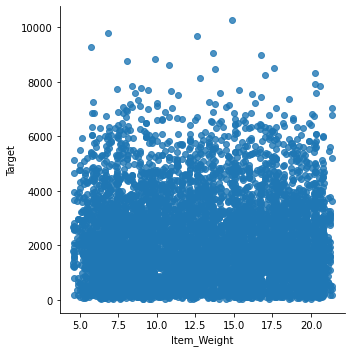

In [101]:
sns.lmplot(x="Item_Weight", y="Item_Outlet_Sales", data=data, order=1)

plt.ylabel('Target')
plt.xlabel('Item_Weight')

As seen in the plot above, there is no correlation between the Item_Weight variable and the target variable. The values are scattered all over the plot, not showing a constant increase/decrease as the Item_Weight increases, making the relationship between the 2 variables non-linear.

 #### 2.2.2 Item_Visibility vs Target <a id="part2.2.2"></a> 
 [Back to top](#top)

Text(0.5, 21.70625000000002, 'Item_Visibility')

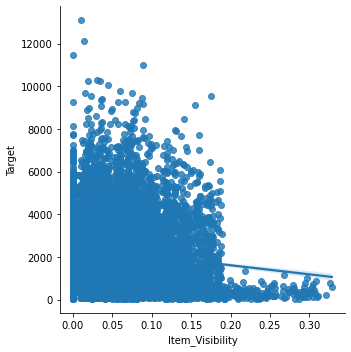

In [102]:
sns.lmplot(x="Item_Visibility", y="Item_Outlet_Sales", data=data, order=1)

plt.ylabel('Target')
plt.xlabel('Item_Visibility')

As seen in the plot above, there is a linear relationship between the Item_Visibility and the target variable. As the Item_Visibility increases, the Target variable decreases in value, causing a Negative Linear relationship between the two variables.

 #### 2.2.3 Item_MRP vs Target <a id="part2.2.3"></a> 
 [Back to top](#top)

Text(0.5, 21.70625000000002, 'Item_MRP')

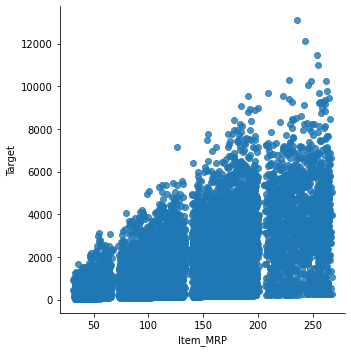

In [103]:
sns.lmplot(x="Item_MRP", y="Item_Outlet_Sales", data=data, order=1)

plt.ylabel('Target')
plt.xlabel('Item_MRP')

There is a linear relationship between the Item_MRP and the target variable. As the Item_MRP increases, the target variable also increases, causing a Positive Linear relationship to take place between the 2 variables.

 #### 2.2.4 Outlet_Establishment_Year vs Target <a id="part2.2.4"></a> 
 [Back to top](#top)

Text(0.5, 21.70625000000002, 'Outlet_Establishment_Year')

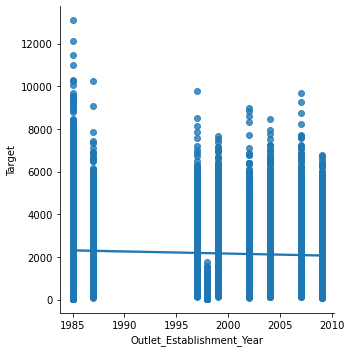

In [104]:
sns.lmplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=data, order=1)

plt.ylabel('Target')
plt.xlabel('Outlet_Establishment_Year')

There is no linear relationship between the Outlet_Establishment_Year and the target variable. As the years go by, there is an uneven increase and decrease in the target variable values, showing that the 2 variables are not correlated by a linear relationship. Hence, the Outlet Establishment year does not affect the Item Outlet Sales.

## 3. Data Cleansing <a id="part3"></a> 
[Back to top](#top)

Data cleaning refers to the process of fixing or removing incorrect, duplicate, incomplete data, etc. within a specific dataset. Data Cleansing aids in getting rid of inconsistent observations, making way for the particular assignment to be triumphant and achieve its goal. When using large datasets, there is a very likely chance that the dataset has incorrect, duplicate and incomplete values. If not corrected, it could lead to massive errors and misleading information when carrying out other analyses, visualisations and dashboards. Thus, Data Cleansing is an essential and effective task that is needed to be done, no matter the case, before undertaking other analyses, leading to a more likely chance of a good and successful report. 

### 3.1 Identify Missing Values<a id="part3.1"></a> 
[Back to top](#top)

No matter the dataset, the likelihood of missing values being present is very high. Missing data can be caused by either random or methodical errors. Missing Data caused by random errors often include multiple data entry errors, careless errors, or misrepresented errors. Missing data caused by methodical errors, on the other hand involve disordered or frayed measurements or questions. To deal with missing data, the usual solutions are to accept the misleading data as a whole, remove the missing values from the dataset or revamp the data. However, there is also another option called Imputation, that involves replacing the missing values with other values that are based on a sensible estimate. This is the solution that we plan on using for this dataset. However, one drawback of using this solution is that it could cause a biased or inaccurate result.

However, before using the Imputation method, we need to first check for the missing values in the dataset. We can do this by making use of the data.isnull().any() function that returns a boolean(True or False) as to whether there are missing values in each particular variable of the dataset. True means there are missing values present and False means there are no missing values present. We will then use the data[variable].describe function to find out the type of variable the missing values are present in. Then we will use the set up the imputer to handle the missing the values present in the dataset.

In [105]:
data.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [106]:
data['Item_Weight'].describe

<bound method NDFrame.describe of 0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64>

In [107]:
data['Outlet_Size'].describe

<bound method NDFrame.describe of 0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object>

After using the data[variable].describe function, we can see that Item_Weight is a float variable while Outlet_Size is a object variable. Thus, as they are 2 different types of variables, we need to use 2 different Imputation methods to handle the missing values. We will use MeanMedianImputer for Item_Weight which replaces the missing values with the median value of the variable. We will also use the CategoricalImputer for Outlet_Size which replaces the missing values with the most frequent value present in the variable.

In [108]:
median_imputer = MeanMedianImputer(imputation_method = 'median',
                                  variables= ['Item_Weight'])

median_imputer.fit(data)

data = median_imputer.transform(data)

In [109]:
mode_imputer = mdi.CategoricalImputer(variables = ['Outlet_Size'],
                                     imputation_method = 'frequent')

mode_imputer.fit(data)

data = mode_imputer.transform(data)

In [110]:
data.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

After Imputation, we can see that there are no null values in any variable, allowing us to move on to the next step.

 ### 3.2 Train and Test Split <a id="part3.2"></a> 
 [Back to top](#top)
 
Upon Imputation to replace missing values, we can then move on to Train and Test Split. Train and Test Split is a technique that is often used in Machine Learning in order to evaluate performance. It is often used for classifications and regression problems but in fact, can actually be used for any specific algorithm in machine learning. It is executed by dividing into 2 subsets called the Train set and the Test set. The Train dataset is used to fit the model so as to return an expected value. The test dataset, however, is used for providing input elements to the dataset to make predictions that can be compared to the expected value. This comparison is made to evaluate the performance of the model. The Train and Test sets can be configured with different percentages. For this case, we are to use a 70-30 split. The code below is used to separate the dataset into the Train and Test sets.

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Item_Outlet_Sales', axis=1), data['Item_Outlet_Sales'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((5966, 11), (2557, 11))

## 4. Data Transformation<a id="part4"></a> 
[Back to top](#top)

Data transformation refers to the process of manipulating data from one format into another. Data Transformation can also be referred to as Data Wrangling, as it transforms data from one format into another to be later used for Analysis.

 ### 4.1 Data Pre-Processing<a id="part4.1"></a> 
[Back to top](#top)

Data Preprocessing is extremely essential in Machine Learning as the data quality and information that is obtained heavily affects the model's capacity for learning. The main agenda for any model is to be precise in making predictions so that the algorithm can easily decipher the data's features. Hence, it is extremely essential to preprocess data before feeding it into the model.

 #### 4.1.1 Before Transformation <a id="part4.1.1"></a> 
[Back to top](#top)

We will first create a method called diagnostic_plots that will display multiple plots, which involves a Histogram, a Q-Q Plot and a Box Plot. This is to give us better insight of the numerical data that we are dealing with.

In [112]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram, Q-Q plot and box-plot
    # side by side, for a certain variable
    
    #define figure size
    plt.figure(figsize=(16,4))
    
    #histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins =30)
    plt.title('Histogram')
    
    #Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    
    #boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')
    

    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


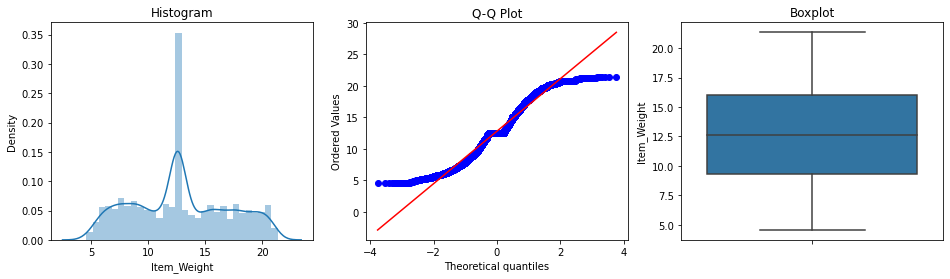

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


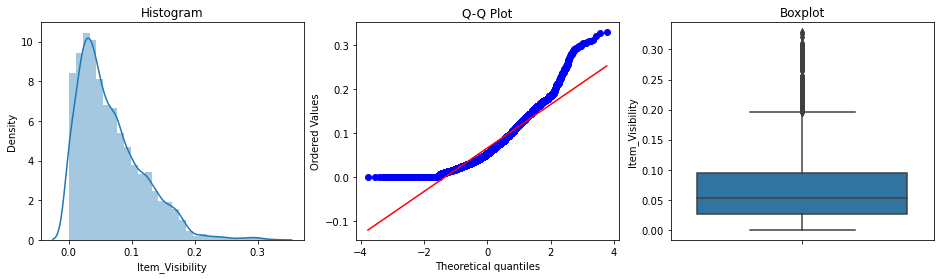

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


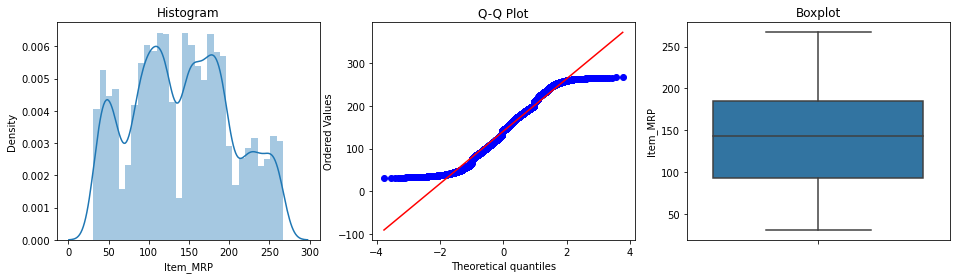

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


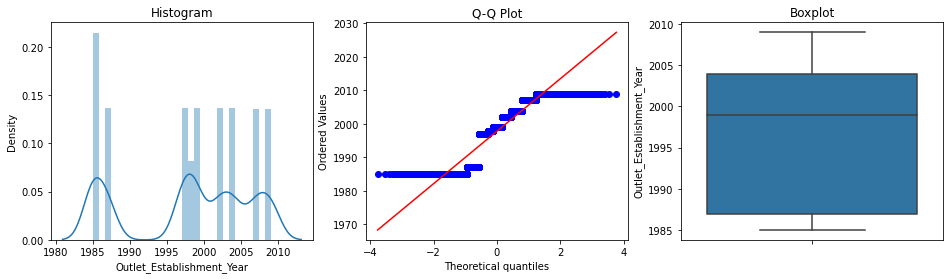

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


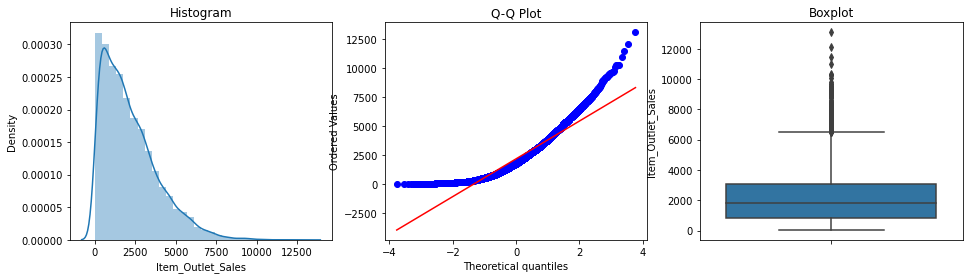

In [113]:
# check original distribution

for i in num_cols:
    diagnostic_plots(data, i)

The histograms for all the numerical variables show that there is an even distribution. However, the values in the Q-Q plots are not very close to the trend line. Moreover, from the Box Plots, it can be observed that there are multiple outliers still present in the data. Hence, there is a need to get rid of these outliers. Thus, we will conduct a transformation of the data using the Yeo-Johnson Transformer. We are going to use the Yeo-Johnson transformation as it is an extension of the Box-Cox transformation and can be used on variables that contain zero and negative values, as well as positive values.



 #### 4.1.2 Before Transformation <a id="part4.1.2"></a> 
[Back to top](#top)

First, we will initialize the transformer before fitting the transformer to the dataset. Then, we will transform the selected variables, and display the diagnostic plots again to see the difference in the dataset.

In [114]:
# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
                                         'Item_Outlet_Sales'])

# fit transformer to the dataframe
yjt.fit(data)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


YeoJohnsonTransformer(variables=['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                 'Outlet_Establishment_Year',
                                 'Item_Outlet_Sales'])

In [115]:
# transform indicated variables

data_tf = yjt.transform(data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


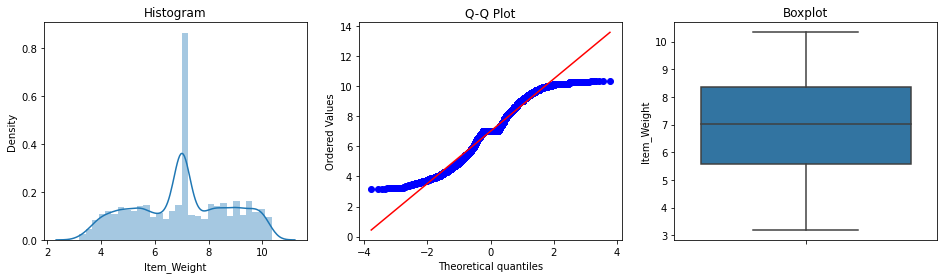

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


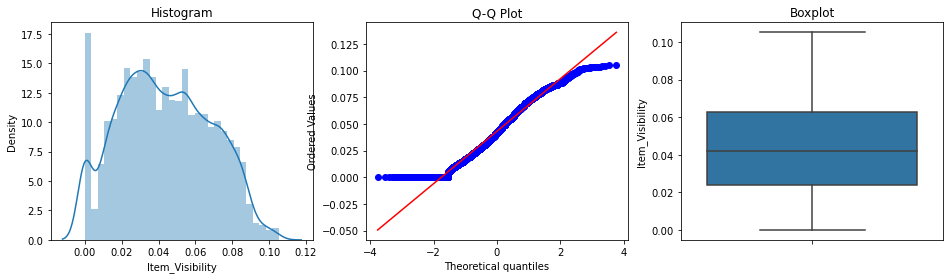

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


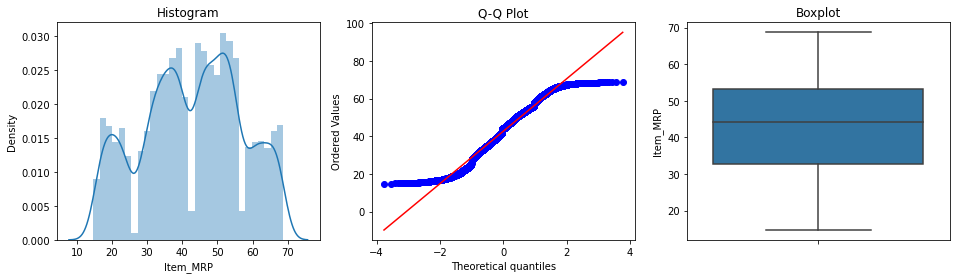

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


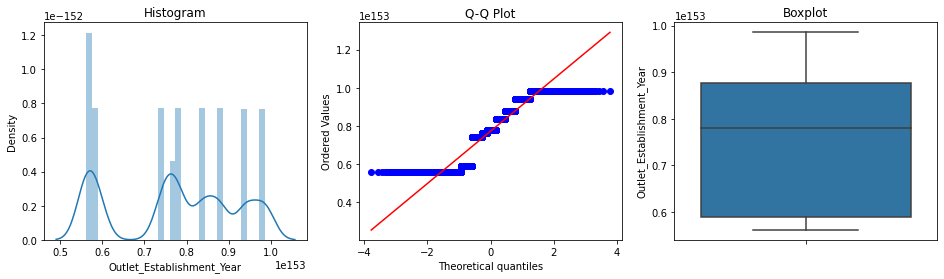

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


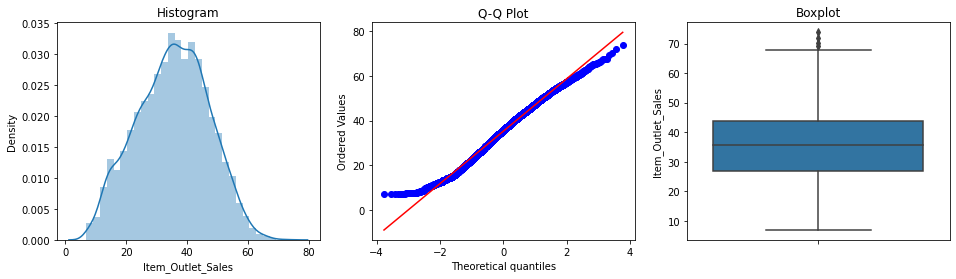

In [116]:
# check new distribution

for i in num_cols:
    diagnostic_plots(data_tf, i)

In [117]:
# the transformer stores the learned parameters for each variable
# in a dictionary as an attribute

yjt.lambda_dict_

{'Item_Weight': 0.6636830498171616,
 'Item_Visibility': -8.702524005001552,
 'Item_MRP': 0.6953350692496496,
 'Outlet_Establishment_Year': 46.82257681997582,
 'Item_Outlet_Sales': 0.3457816162326074}

After Transformation, we can see that the Histograms have an even better distribution than before. We can also see that the values in the Q-Q plots are also closer to the trend line, making the model more accurate. Finally, we can also see that all the outliers that were present in the Box Plot previously are no longer present, essentially making the data more efficient and accurate.

### 4.2 Categorical Data Encoding<a id="part4.2"></a> 
[Back to top](#top)

Encoding Categorical Data is another essential facet of Machine Learning. Categorical variables are essentially variables that are usually discrete and uncontinuous. As our data currently contains multiple categorical variable that can't be used by the Regression Model, we are required to encode the Categorical Data. There are multiple variations of Categorical Data Encoding. The one we are going to use goes by the name of Ordinal Encoding which replaces the categories with Ordinal numbers. It consists of replacing the categories with digits from `1 to k` (or `0 to k-1`, depending on the implementation), where `k` is the number of distinct categories of the variable. The numbers are also assigned arbitrarily.
Ordinal encoding is often better suited for non-linear machine learning models, as they can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target in any way, shape or form.

First, we will create the ordinal encoder, then fit the encoder to the X_train set. We will then transform, the train and test sets before displaying the preview of the X_train sets using the X_train.head() function.

In [118]:
data_tf_cat_columns = [c for c in data_tf.columns if data[c].dtypes=='O']
data_tf_cat_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [119]:
# let's create the encoder

ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=data_tf_cat_columns)

In [120]:
# let's fit the encoder to the train set

ordinal_enc.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['Item_Identifier', 'Item_Fat_Content', 'Item_Type',
                          'Outlet_Identifier', 'Outlet_Size',
                          'Outlet_Location_Type', 'Outlet_Type'])

In [121]:
# let's inspect which variables the encoder will encode

ordinal_enc.variables

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [123]:
# let's transform the train and test sets

X_train_enc = ordinal_enc.transform(X_train)
X_test_enc = ordinal_enc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:193: UserWarning: During the encoding, NaN values were introduced in the feature(s) Item_Identifier.
  warnings.warn(


In [124]:
# let's explore the result

X_train_enc.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
88,0,6.305,0,0.123116,0,95.6436,0,1997,0,0,0
6813,1,5.980,1,0.043809,1,146.8418,1,2007,1,1,0
4046,2,12.600,1,0.072317,2,160.7920,2,1985,1,2,1
8194,3,12.600,0,0.299098,3,157.8630,3,1985,0,0,2
8293,4,9.100,1,0.080278,2,47.2718,4,2004,0,1,0


### 4.3 Variable Discretization/Binning<a id="part4.3"></a> 
[Back to top](#top)

Discretization refers to the process through which we transform continuous variables, models and functions into a discrete form. We can do this by creating a series of regular intervals (or bins) across the range of our desired variable. It also becomes easier to understand continuous data when split into regular intervals. Just like there are various ways to do Categorical Encoding, there are multiple ways to conduct Variable Discretization/Binning. We are going to use Equal Width Discretization, which usually entails separating all the values into `n` number of bins, each of them having the same width as one another. First, we will initiate the Equal Width Discretisizer before fitting it to the X_train_enc. We will then transform the train and test sets, followed by creating a method called DisplayProportions that shows the percetage of observations per bin for each numerical variable.

In [125]:
num_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [126]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualWidthDiscretiser(
    bins=10, variables = num_columns, return_object=True)

disc.fit(X_train_enc)

EqualWidthDiscretiser(return_object=True,
                      variables=['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                 'Outlet_Establishment_Year'])

In [127]:
X_train_enc.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object

In [128]:
# transform train and test sets

train_t = disc.transform(X_train_enc)
test_t = disc.transform(X_test_enc)

In [129]:
train_t.dtypes

Item_Identifier               int64
Item_Weight                  object
Item_Fat_Content              int64
Item_Visibility              object
Item_Type                     int64
Item_MRP                     object
Outlet_Identifier             int64
Outlet_Establishment_Year    object
Outlet_Size                   int64
Outlet_Location_Type          int64
Outlet_Type                   int64
dtype: object

In [130]:
# create a method to first calculate, then display the proportion of observations per interval

def DisplayProportions(category, train_set, test_set):
    
    # calculate proportion of observations per interval
    t1 = train_set.groupby(category)[category].count() / len(train_t)
    t2 = test_set.groupby(category)[category].count() / len(test_t)
    
    # concatenate aggregated views
    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']

    # plot
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Percentage of observations per bin')

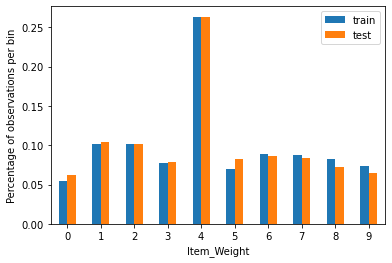

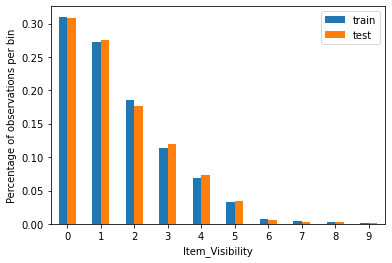

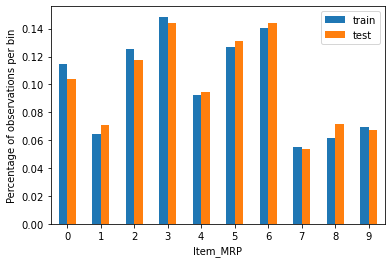

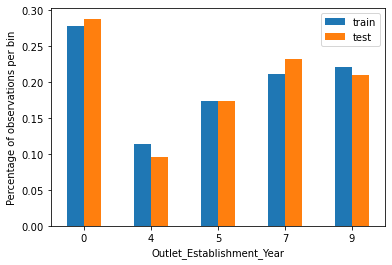

In [131]:
for i in num_columns:
    DisplayProportions(i, train_t, test_t)

## 5. Feature Engineer<a id="part5"></a> 
[Back to top](#top)

Feature scaling in machine learning is one of the most integral actions needed to be done during the pre-processing of data before creating a machine learning model as it can cause the variation between a weak machine learning model and a better one. Machine Learning Algorithms such as Linear Regression require the use of Gradient Descent. They require its use as it acts a Optimization Technique which in turns needs data to be scaled. The image below shows the formula for Gradient Descent.

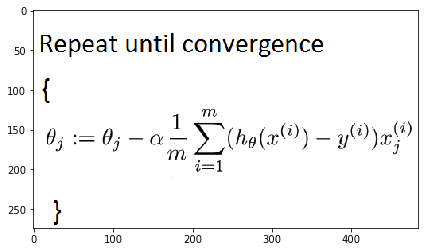

In [132]:
img = io.imread("./data/gradient_descent_image.png")
io.imshow(img)

The presence of the feature value X in the formula affects the step size of the gradient descent. The difference in ranges of features causes different step sizes for every single feature. Hence, in order to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at a similar speed for all the features, we are required to scale the data before inputing it to the model.

Moreover, having features that are on a similar scale helps the gradient descent to converge at a much higher rate towards the minima.

### 5.1 Normalisation <a id="part5.1"></a>
[Back to top](#top)

Normalization is a scaling technique, which involves values being shifted and rescaled such that they range between the values of `0 ` and `1`. It also goes by another name of Min-Max scaling. The image below showcases the formula for Min-Max Scaling.

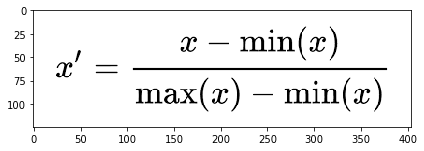

In [133]:
img1 = io.imread("./data/Min_Max_scaling_formula.png")
io.imshow(img1)

In the above formula, Xmax and Xmin represent the maximum and the minimum values of the feature respectively. In case the value of `x` is the same as `min(x)`, the numerator will be equal to `0`. However, if the `x` value is the same as `max(x)`, the value of the numerator would be the same as the denominator, causing the `x'` value to be `1`. On the other hand, should the value of `x` be between `0` and `1`, the value of `x'` would be between `0 and 1` as well.

### 5.2 Standarisation <a id="part5.2"></a>
[Back to top](#top)

Standardisation refers to another scaling technique where the values are centered around the mean with a unit standard deviation. This results in the mean of the attribute becoming `0` and the resultant distribution in having a unit standard deviation. The image below showcases the formula for Standardisation.

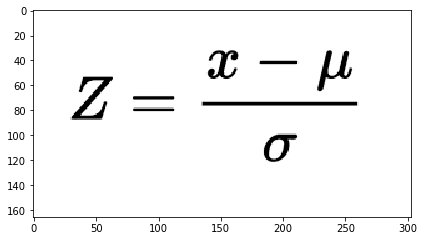

In [134]:
img2 = io.imread("./data/standardisation_formula.png")
io.imshow(img2)

### 5.3 Normalisation VS Standarisation <a id="part5.3"></a>
[Back to top](#top)

Normalization is often used when it is known for a fact that the data doesn't follow a Gaussian Distribution. Standardisation, on the other hand is often used when the data does in fact follow a Gaussian Distribution. Another scenario in which Standardisation is used, is when there is outliers as Standardisation has no bounding ranges.

As the dataset we're using does not follow a Gaussian Distribution and does not have any outliers, it is better to make use of Normalisation. Thus, we will first set up the MinMaxScaler before fitting the scaler to `train_t`. Then, we will transform the train and test sets. We will then use the `scaler.data_max_`, `scaler.min_` and `scaler.data_range_` functions to ensure if the data has been transformed.

In [135]:
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(train_t)

# transform train and test sets
X_train_scaled = scaler.transform(train_t)
X_test_scaled = scaler.transform(test_t)

In [136]:
scaler.data_max_

array([1547.,    9.,    4.,    9.,   15.,    9.,    9.,    9.,    2.,
          2.,    3.])

In [137]:
# tthe scaler stores the minimum values of the features, learned from train set
scaler.min_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [138]:
# the scaler also stores the value range (max -  min)

scaler.data_range_

array([1547.,    9.,    4.,    9.,   15.,    9.,    9.,    9.,    2.,
          2.,    3.])

### 5.4 PlotScale <a id="part5.4"></a>
[Back to top](#top)

After completing MinMaxScaling, we will create a method called `PlotScale` to show 2 plots, `Before Scaling` and `After Scaling`, which serves as a way to prove that the data has undergone Feature Scaling. Before creating the method, however, we will first transform the train and test sets to dataframes.

In [139]:
# let's transform the returned train and test sets to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_t.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=test_t.columns)

In [140]:
def PlotScale(train_set, column_name, train_scaled):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    for column in column_name:
        sns.kdeplot(train_set[column], ax=ax1, label =column)
        sns.kdeplot(X_train_scaled[column], ax=ax2, label =column)
        
    #before scaling
    ax1.set_title('Before Scaling')
    ax1.legend()
    
    #after scaling
    ax2.set_title('After Scaling')
    ax2.legend()
    
    plt.show()

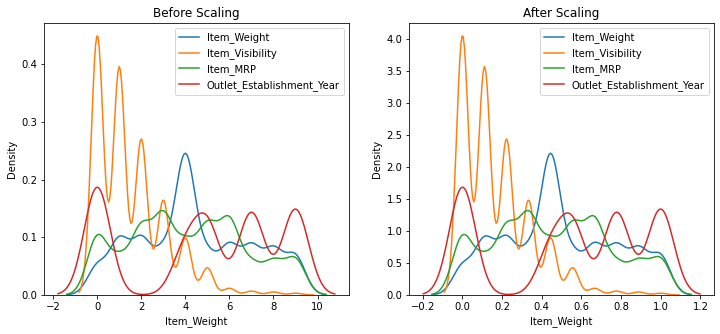

In [141]:
PlotScale(train_t, num_columns, X_train_scaled)

## 6. Linear Regression Model <a id="part6"></a> 
[Back to top](#top)



Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).

The equation representing this line is as follows:

`Y = a + b * X + e`

In the above equation: a represents the intercept, b represents the slope of the line, while e represents the error term. The accuracy of the machine learning model can be found out through the usage of this method. Despite the fact that this model is immensely popular for the benefits it provides in terms of Data Analysis. One disadvantage of using this method is that it is likely to provide us with less accurate results.

### 6.1 Building and Evaluating the Model <a id="part6.1"></a>
[Back to top](#top)

In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- `Root Mean Square Error (RMSE)`: The RMSE is the square root of the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of RMSE indicate better fit and model performance.
- `R-Square`: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

First, we will assign the fully cleaned and transformed data present within X_train_scaled, X_test_scaled, y_train and y_test into the prepared variables of X_train_final, X_test_final, y_train_final and y_test_final.

Then, we will import all the necessary packages required for the Linear Regression Model. Upon importing all the packages that are necessary, we will build the Linear Regression Model.

In [142]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_scaled, X_test_scaled,
# y_train_ and y_test_ into
# the prepared variables below, for a simple linear regression model

In [143]:
X_test_scaled['Item_Identifier']=X_test_scaled['Item_Identifier'].fillna(0)

In [144]:
X_train_final = X_train_scaled
X_test_final = X_test_scaled

y_train_final = y_train
y_test_final = y_test

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [146]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Root Mean Square Error (RMSE)
# The lower MAE, the better the model performance
print('train_rmse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_rmse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_rmse: 1685940.883534716 
 test_rmse: 1824435.5322787808
train_r-sq: 0.4092789609927543 
 test_r-sq: 0.40085837454941087


The train set's `RMSE` was `1685941` to the nearest whole number while the test set's `RMSE` was `1824436` to the nearest whole number. This means that the test set has overperformed the train set. Moreover, as the test set's `RMSE` was higher than the train set's `RMSE`, there is a likelihood that there could be overfitting involved. However, the values are not too far apart, meaning that the train and test set's distribution of predictions are more similar than they are different.

The train set's `R-SQ` was `0.41` to the nearest hundredth whereas the test set's `R-SQ` was `0.40` to the nearest hundredth number. This proves that the train and test sets are in fact very similar to one another to the points where they are basically more similar than they are different. Moreover, the `R-SQ` values for both, the train and the test sets were somewhat close to 1. This, in turn means that they are a decent fit and the model has performed decently. However, that does not mean that they could not have performed better, especially because there is a high chance that overfitting has taken place for the test set.

## 7. Summary and Further Improvements <a id="part7"></a> 
[Back to top](#top)

In this report, we preprocessed and analyzed a supermarket dataset with about 8000 rows and built a predictive Linear Regression model that returned us with `RMSE` and `R-SQ` values. We also performed Feature Scaling using `Normalisation` through `Min-Max Scaling`. This was done after `Imputation`, Transforming using `Yeo-Johnson Tranformer`, using `Ordinal Encoding` and using `Equal Width Discretiser` for Variable Discretization/Binning. The `R-SQ` model achieved a decent score of `0.40` while the `RMSE` model also attained a decent score of `184436` to the nearest whole number. This means that the model performed decently.

However, just like everything else in life, the results can still be improved. Firstly, there is very high liklihood that `Overfitting` took place for the test set as the `RMSE` values for the Test set was higher than that of the Train set. This needs to be avoided in future events when I make use of Linear Regression Models. Moreover, I did not make use of any additional `Mathematical Computations` to the Feature Scaling which could have resulted in a better model performance too. Hence, these are the improvements I would make to this model.

